# Building a Movie Recommendation System 

## Introduction

In this project we will be examining ways to work with data to build a recommendation system to predict movie titles a particular user may enjoy based on their previous choices. 

## Importing and Examining Data

In [1]:
#Importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


In [2]:
# Creating dataframes of all needed CSV files
links  = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

In [3]:
#Examining each table 
print(links.head())
len(links)

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


9742

In [4]:
print(ratings.head())
len(ratings)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


100836

In [5]:
print(movies.head())
len(movies)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


9742

In [6]:
print(tags.head())
len(tags)

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


3683

In [7]:
# Merging databases to create a master workind table. 
working1 = tags.merge(movies,how='left', left_on='movieId', right_on='movieId')

In [8]:
working1.head()

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,2,89774,Boxing story,1445715207,Warrior (2011),Drama
4,2,89774,MMA,1445715200,Warrior (2011),Drama


In [9]:
working_df = working1.merge(ratings,how='left', left_on='movieId', right_on='movieId')

In [10]:
working_df.head(20)

,userId_x,movieId,tag,timestamp_x,title,genres,userId_y,rating,timestamp_y
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy,2.0,5.0,1.445715e+09
1,2,60756,funny,1445714994,Step Brothers (2008),Comedy,18.0,3.0,1.455749e+09
2,2,60756,funny,1445714994,Step Brothers (2008),Comedy,62.0,3.5,1.528934e+09
3,2,60756,funny,1445714994,Step Brothers (2008),Comedy,68.0,2.5,1.269123e+09
4,2,60756,funny,1445714994,Step Brothers (2008),Comedy,73.0,4.5,1.464196e+09
5,2,60756,funny,1445714994,Step Brothers (2008),Comedy,103.0,4.0,1.431955e+09
6,2,60756,funny,1445714994,Step Brothers (2008),Comedy,111.0,5.0,1.516141e+09
7,2,60756,funny,1445714994,Step Brothers (2008),Comedy,125.0,4.0,1.474372e+09
8,2,60756,funny,1445714994,Step Brothers (2008),Comedy,232.0,3.5,1.241823e+09
9,2,60756,funny,1445714994,Step Brothers (2008),Comedy,249.0,4.0,1.356550e+09


In [11]:
len(working_df)

233234

In [12]:
working_df.describe()

,userId_x,movieId,timestamp_x,userId_y,rating,timestamp_y
count,233234.000000,233234.000000,2.332340e+05,233213.000000,233213.000000,2.332130e+05
mean,470.681354,12320.574029,1.384754e+09,309.688191,3.966535,1.213524e+09
std,153.324249,28243.308898,1.534705e+08,178.206387,0.968637,2.250448e+08
min,2.000000,1.000000,1.137179e+09,1.000000,0.500000,8.281246e+08
25%,424.000000,296.000000,1.242494e+09,156.000000,3.500000,1.017365e+09
50%,477.000000,1198.000000,1.457901e+09,309.000000,4.000000,1.217325e+09
75%,599.000000,4638.000000,1.498457e+09,460.000000,5.000000,1.443201e+09
max,610.000000,193565.000000,1.537099e+09,610.000000,5.000000,1.537799e+09


After executing multiple merges and examining the data - I determined it was unnecissarily complex and included a number of fields that were note needed to make recommendations. 

In [13]:
# Creating a new working df with the needed data.
df = pd.merge(ratings, movies, on='movieId')

In [14]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [15]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Creating a Simplified Recommendation System 

In [16]:
# Creating a datafram containing only the raw rating data. 
rate_df = pd.DataFrame(df.groupby('title')['rating'].mean())

In [17]:
rate_df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


As you can see in this table the frame has been simplified to only include the title and rating! 

In [18]:
#Adding a column to include the number of ratings
rate_df['number_of_ratings'] = df.groupby('title')['rating'].count()

In [19]:
rate_df.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


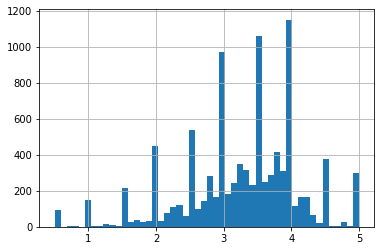

In [20]:
rate_df['rating'].hist(bins=50)

As you can see most titles have a rating that falls between 2.5 and 4 

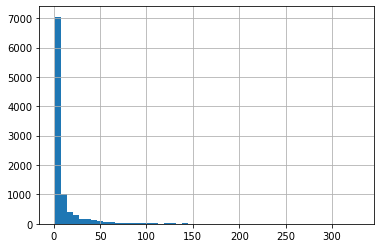

In [21]:
rate_df['number_of_ratings'].hist(bins=50)

From this histplot it becomes more evident that most titles have few ratings 

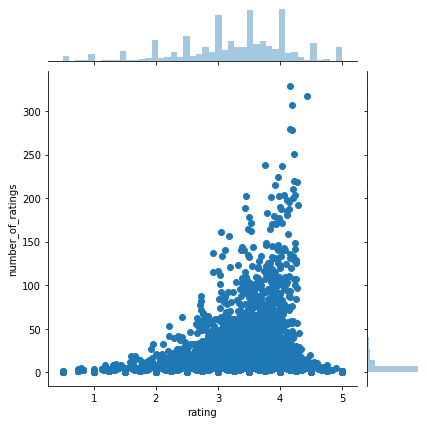

In [22]:
sns.jointplot(x='rating', y='number_of_ratings', data=rate_df)

Examining this relationship farther we can see that the high rated titles tend to have in excess of 100 ratings. 

In [23]:
# Creating a matirx that contains every movie title with its associated rating
# this is mostly used for cross referencing future date to the correct title 
matrix = df.pivot_table(index='userId', columns='title', values='rating')


In [24]:
matrix.dropna()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,


In [25]:
matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
rate_df.sort_values('number_of_ratings', ascending=False).head(10)

# Ratings are sorted and combined with the column for each title. 

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [27]:
FG_rating= matrix['Forrest Gump (1994)']
PF_rating= matrix['Pulp Fiction (1994)']

For this part of the project we select two test cases - movies that I have personally seen and enjoy. Using these two test cases we will create a simplistic recommendation system to predict other titles that I may enjoy. 

In [28]:
FG_rating.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [29]:
PF_rating.head(10)

userId
1     3.0
2     NaN
3     NaN
4     1.0
5     5.0
6     2.0
7     NaN
8     4.0
9     NaN
10    1.0
Name: Pulp Fiction (1994), dtype: float64

In [30]:
# Creating a table with similar correlation based on the rating for each title
sim_FG_rating = matrix.corrwith(FG_rating)

In [31]:
sim_FG_rating.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

From the head alone the data isnt very useful as many of the titles do not have a rating that was also rated with the chosen titles.

In [32]:
corr_FG = pd.DataFrame(sim_FG_rating, columns = ['Correlation'])
corr_FG.dropna(inplace=True)
corr_FG.head(20)

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.752057
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.088009
"10,000 BC (2008)",-0.143823


Therefor a new table showing correlation is created between each rating value, however this is still not sorted properly to show similarly rated movie titles. 

In [33]:
sim_PF_rating = matrix.corrwith(PF_rating)

In [34]:
corr_PF = pd.DataFrame(sim_PF_rating, columns = ['Correlation'])
corr_PF.dropna(inplace=True)
corr_PF.head(20)

,Correlation
title,
"'burbs, The (1989)",-0.187323
(500) Days of Summer (2009),-0.044034
*batteries not included (1987),-0.738549
...And Justice for All (1979),-0.188982
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.201347
10 Things I Hate About You (1999),-0.126206
"10,000 BC (2008)",-0.409514
101 Dalmatians (1996),0.289800


In [35]:
corr_PF = corr_PF.join(rate_df['number_of_ratings'])
corr_FG = corr_FG.join(rate_df['number_of_ratings'])


In [36]:
corr_PF.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.187323,17
(500) Days of Summer (2009),-0.044034,42
*batteries not included (1987),-0.738549,7
...And Justice for All (1979),-0.188982,3
10 Cent Pistol (2015),1.000000,2


In [37]:
corr_FG.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


This is a better visualization including the number of ratings, based on the above visualization of correlation we are really only interested in titles with lots of ratings so below we will filter the list showing only film titles with over 100 ratings and sorting it in a descending order. 

In [38]:
corr_PF[corr_PF['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
"Usual Suspects, The (1995)",0.411700,204
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.402193,120
Eternal Sunshine of the Spotless Mind (2004),0.401534,131
Reservoir Dogs (1992),0.394687,131


This is a particularly interesting result that seems to show our recommendation system is effective as without accounting for it in the data or model the system has recommended multiple films by the same director of "Pulp Fiction". As you can see "Kill Bill" 1 & 2, and "Reservoir Dog" are also on the list and directed by the same person as "Pulp Fiction". So even without advanced modeling and scoring it is safe to assume that this method of recommendation will be fairly accurate. 

In [39]:
corr_FG[corr_FG['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


## Recommendation System using Sci-kit - Surprise 

In [54]:
# Reimporting the ratings database for cleaner data
ratings = pd.read_csv('ratings.csv')

In [55]:
# Drop unnecessary columns
new_df = ratings.drop(columns='timestamp')

In [65]:
#importing addtional libraries for support 
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np
reader=Reader()
data = Dataset.load_from_df(new_df,reader)



In [58]:
# Building traininig data
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [59]:
#Importing models and tool selection

import numpy as np

In [60]:
# Finding optimized model values 
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [63]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8695580732090831, 'mae': 0.6686043561667582}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 20, 'reg_all': 0.02}}


In [66]:
# Crpss validation of the data
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)



In [67]:
for i in cv_knn_basic.items():
    print(i)
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.97418468, 0.97127893, 0.9697542 , 0.96885666, 0.97636538]))
('test_mae', array([0.75246491, 0.75153995, 0.74958845, 0.74539425, 0.75437848]))
('fit_time', (0.5276820659637451, 0.7171051502227783, 0.6829161643981934, 0.74485182762146, 0.5454108715057373))
('test_time', (1.9772670269012451, 1.7496147155761719, 1.76680588722229, 1.5901610851287842, 1.4725029468536377))
0.9720879717873233


In [68]:
# Creating knn baseline and cross validation metrics 
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline,data)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [69]:
# Developing value for KNN baseline accuracy 
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.87159315, 0.88057838, 0.86665248, 0.88064444, 0.88309535]))
('test_mae', array([0.66508452, 0.67392212, 0.66346316, 0.67176133, 0.67366661]))
('fit_time', (1.0163118839263916, 1.2252485752105713, 0.8334269523620605, 0.9242498874664307, 0.8852527141571045))
('test_time', (2.9417269229888916, 2.4172801971435547, 2.198589324951172, 2.2923901081085205, 2.264207124710083))


0.8765127596711098

In [70]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
# Fitting the model for baseline data - values and paramaters used are the ones from section 4 course material 
svd = SVD(n_factors= 50, reg_all=0.05)
svd.fit(dataset)

In [72]:
svd.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=2.8115661352011605, details={'was_impossible': False})

In [81]:
# Creating a funtion to prompt users and create list of similar 

def movie_recommendation_system(movie_df,num, genre=None):
    userID = input()
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('Rate the title using 1-5, press n if you have not seen this title :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list



Running this function will prompt the user to input a few fields, first is the user ID that the user wishes to view recommendations for, second is it will prompt the user to input a score from 1-5 for each movie title with n representing that they have not seen the title. 

In [122]:
# Running the above funtion with movies set as the database, 5 represeninting the number of titles to review and 
# the final value representing the genre. 
user_rating = movie_recommendation_system(movies, 5, 'Adventure')

1000
    movieId                title                  genres
77       86  White Squall (1996)  Action|Adventure|Drama
Rate the title using 1-5, press n if you have not seen this title :
5
      movieId                                       title            genres
7230    73499  MacGyver: Lost Treasure of Atlantis (1994)  Action|Adventure
Rate the title using 1-5, press n if you have not seen this title :
n
      movieId                         title           genres
4926     7386  Ten Commandments, The (1956)  Adventure|Drama
Rate the title using 1-5, press n if you have not seen this title :
3
      movieId                              title                   genres
7832    93139  Mega Shark vs. Crocosaurus (2010)  Action|Adventure|Horror
Rate the title using 1-5, press n if you have not seen this title :
n
      movieId                   title                              genres
6915    64249  Shrek the Halls (2007)  Adventure|Animation|Comedy|Fantasy
Rate the title using 1-5, press

In [123]:
user_rating



[{'userId': '1000', 'movieId': 86, 'rating': '5'},
 {'userId': '1000', 'movieId': 7386, 'rating': '3'},
 {'userId': '1000', 'movieId': 6537, 'rating': '3'},
 {'userId': '1000', 'movieId': 122892, 'rating': '4'},
 {'userId': '1000', 'movieId': 72982, 'rating': '3'}]

In [124]:
new_ratings_df = new_df.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

In [125]:
svd_ = SVD(n_factors= 50, reg_all=0.05)
svd_.fit(new_data.build_full_trainset())

In [126]:
list_of_movies = []
for m_id in movies['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

In [127]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)


In [128]:
def recommended_movies(user_rating,movie_title_df,n):
        for idx, rec in enumerate(user_rating):
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
            print('Recommendation # ', idx+1, ': ', title, '\n')
            n-= 1
            if n == 0:
                break
recommended_movies(ranked_movies,movies,10)

Recommendation #  1 :  277    Shawshank Redemption, The (1994)
Name: title, dtype: object 

Recommendation #  2 :  602    Dr. Strangelove or: How I Learned to Stop Worr...
Name: title, dtype: object 

Recommendation #  3 :  906    Lawrence of Arabia (1962)
Name: title, dtype: object 

Recommendation #  4 :  841    Streetcar Named Desire, A (1951)
Name: title, dtype: object 

Recommendation #  5 :  659    Godfather, The (1972)
Name: title, dtype: object 

Recommendation #  6 :  2226    Fight Club (1999)
Name: title, dtype: object 

Recommendation #  7 :  680    Philadelphia Story, The (1940)
Name: title, dtype: object 

Recommendation #  8 :  686    Rear Window (1954)
Name: title, dtype: object 

Recommendation #  9 :  46    Usual Suspects, The (1995)
Name: title, dtype: object 

Recommendation #  10 :  914    Goodfellas (1990)
Name: title, dtype: object 



## Conclusions 

In conclusion I was impressed with the accuracy of the recommendation system without using modeling, the recommendations based entirely on correlation are surprisingly accurate and produce useful result. 
However the ability to incorporate a model that learns from user input is very powerful and with proper data and user input can be scaled an a very large scale. I would like to continue to tweak the results to see if I can get better more defined recommendations for the system. Also there is a cache issue where sometime the recommend_movies function fails to load the above user ratings I have defined. 